# 📦 Wprowadzenie – czym jest Olist?

Olist to jedna z największych brazylijskich platform e-commerce typu marketplace aggregator.

# 🔹 Od kiedy działa?

Firma powstała ok. 2015–2016 roku (scale-up z branży marketplace).

W latach 2016–2018 przeżyła gwałtowny wzrost — właśnie ten okres znajduje się w datasetach.

# 🔹 Czym się zajmuje?

Oferuje sprzedawcom możliwość sprzedaży produktów w wielu marketplace’ach jednocześnie:

Mercado Livre (brazylijski „Allegro”)

Americanas

Submarino

Magalu

i inne

Olist daje:

integrację zamówień,

fulfillment,

zarządzanie ofertami,

logistykę i monitoring przesyłek,

jakość obsługi klienta.

# 🔹 Dlaczego ich dane są publiczne?

Olist udostępnił pełny, zanonimizowany dataset, który stał się jednym z najbardziej popularnych zestawów e-commerce w Kaggle.

Dataset został użyty do:

badań akademickich,

benchmarków ML,

projektów data science,

konkursów i portfolio.

# 🔹 Zakres datasetu (co wchodzi w skład):

100k zamówień → customer + order timelines

110k pozycji zamówień (order items) → price, freight

3k sprzedawców

32k produktów

1M punktów geolokalizacji

100k opinii (review_score, komentarze)

# 🔹 Okres danych:

styczeń 2017 – sierpień 2018 – pełne miesiące

fragmentarycznie 2016 – start działalności (dlatego takie anomalie → i dobrze je opisaliśmy!)

wrzesień 2018 – niepełny miesiąc → dlatego go usunęliśmy

# 🔹 Dlaczego Olist świetnie nadaje się do EDA?

Realny biznes → prawdziwe procesy

8 połączonych tabel → można zrobić wszystko:

analizę sezonowości

logistykę i opóźnienia

segmentację produktów

performance sprzedawców

mapy i geolokalizację

In [ ]:
import pandas as pd

path = r"C:\Users\baxiu\Desktop\od_zera_do_ai\Ecommerce_Olist\\"  # <-- Twój folder

customers = pd.read_csv(path + "olist_customers_dataset.csv")
orders = pd.read_csv(path + "olist_orders_dataset.csv")
order_items = pd.read_csv(path + "olist_order_items_dataset.csv")
payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")
products = pd.read_csv(path + "olist_products_dataset.csv")
sellers = pd.read_csv(path + "olist_sellers_dataset.csv")
geolocation = pd.read_csv(path + "olist_geolocation_dataset.csv")

customers.head()


In [ ]:
customers.info()
orders.info()
order_items.info()
payments.info()
reviews.info()
products.info()
sellers.info()
geolocation.info()


In [55]:
import pandas as pd

# --- ORDERS ---
date_cols_orders = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

for col in date_cols_orders:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

# --- ORDER_ITEMS ---
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce"
)

# --- REVIEWS ---
reviews["review_creation_date"] = pd.to_datetime(
    reviews["review_creation_date"], errors="coerce"
)
reviews["review_answer_timestamp"] = pd.to_datetime(
    reviews["review_answer_timestamp"], errors="coerce"
)


In [ ]:
orders[date_cols_orders].dtypes

In [ ]:
# Rok / miesiac / dzien
orders["rok_zakupu"] = orders["order_purchase_timestamp"].dt.year
orders["miesiac_zakupu_nr"] = orders["order_purchase_timestamp"].dt.month

# Nazwy miesiecy po polsku
mapa_miesiecy = {
    1: "styczeń", 2: "luty", 3: "marzec", 4: "kwiecień",
    5: "maj", 6: "czerwiec", 7: "lipiec", 8: "sierpień",
    9: "wrzesień", 10: "październik", 11: "listopad", 12: "grudzień",
}
orders["miesiac_zakupu_nazwa"] = orders["miesiac_zakupu_nr"].map(mapa_miesiecy)

# Dni tygodnia po polsku
dni_map = {
    "Monday": "poniedziałek",
    "Tuesday": "wtorek",
    "Wednesday": "środa",
    "Thursday": "czwartek",
    "Friday": "piątek",
    "Saturday": "sobota",
    "Sunday": "niedziela",
}

orders["dzien_tygodnia_en"] = orders["order_purchase_timestamp"].dt.day_name()
orders["dzien_tygodnia_pl"] = orders["dzien_tygodnia_en"].map(dni_map)

orders[[
    "order_purchase_timestamp",
    "rok_zakupu",
    "miesiac_zakupu_nazwa",
    "dzien_tygodnia_pl"
]].head()


In [ ]:
opis_orders = {
    "order_id": "ID zamówienia (unikalny identyfikator)",
    "customer_id": "ID klienta (powiązanie z tabelą customers)",
    "order_status": "Status zamówienia (delivered, shipped, canceled itd.)",
    "order_purchase_timestamp": "Data i godzina złożenia zamówienia",
    "order_approved_at": "Data i godzina zatwierdzenia płatności",
    "order_delivered_carrier_date": "Data przekazania przesyłki przewoźnikowi",
    "order_delivered_customer_date": "Data doręczenia zamówienia klientowi",
    "order_estimated_delivery_date": "Szacowana data dostawy",
    "rok_zakupu": "Rok z daty zakupu (cecha dodana w EDA)",
    "miesiac_zakupu_nazwa": "Miesiąc zakupu (nazwa po polsku)",
    "dzien_tygodnia_pl": "Dzień tygodnia zakupu (po polsku)",
}

df_opis_orders = (
    pd.DataFrame.from_dict(opis_orders, orient="index", columns=["opis_pl"])
    .reset_index()
    .rename(columns={"index": "kolumna"})
)

df_opis_orders.head()


In [59]:
zamowienia_miesiac = (
    orders
    .groupby(["rok_zakupu", "miesiac_zakupu_nr", "miesiac_zakupu_nazwa"])
    .size()
    .reset_index(name="liczba_zamowien")
    .sort_values(["rok_zakupu", "miesiac_zakupu_nr"])
)

zamowienia_miesiac.head()


,rok_zakupu,miesiac_zakupu_nr,miesiac_zakupu_nazwa,liczba_zamowien
0,2016,9,wrzesień,4
1,2016,10,październik,324
2,2016,12,grudzień,1
3,2017,1,styczeń,800
4,2017,2,luty,1780


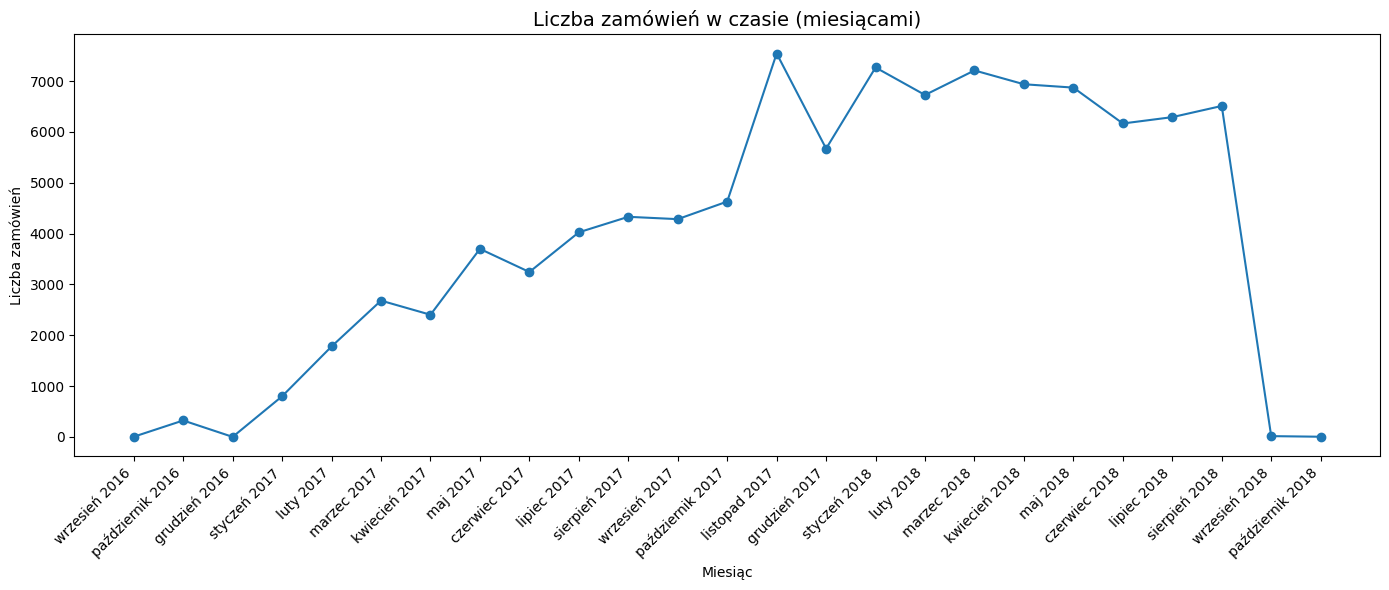

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(
    zamowienia_miesiac.index,
    zamowienia_miesiac["liczba_zamowien"],
    marker="o"
)

labels = (
    zamowienia_miesiac["miesiac_zakupu_nazwa"]
    + " " 
    + zamowienia_miesiac["rok_zakupu"].astype(str)
)

plt.xticks(
    zamowienia_miesiac.index,
    labels,
    rotation=45,
    ha='right'
)

plt.title("Liczba zamówień w czasie (miesiącami)", fontsize=14)
plt.ylabel("Liczba zamówień")
plt.xlabel("Miesiąc")
plt.tight_layout()
plt.show()


# 📝Komentarz: Dlaczego dane z 2016 i września 2018 wyglądają nielogicznie?

W danych obserwujemy nietypowe wartości:

grudzień 2016: tylko 1 zamówienie

październik 2016: aż 324 zamówienia

wrzesień 2018: gwałtowny spadek liczby zamówień względem sierpnia 2018

## Te zjawiska nie wynikają z błędu, ale ze sposobu powstania datasetu Olist:

### 1) Olist dopiero startował w 2016 roku

platforma została uruchomiona w 2015/2016,

pierwsze miesiące działalności były niestabilne,

proces onboardingu sprzedawców trwał,

dane z końcówki 2016 są niepełne i fragmentaryczne.

Dlatego np. październik może mieć 324 zamówienia, ale grudzień tylko 1 – to jest naturalny efekt start-upowej fazy działania.

### 2) Wrzesień 2018 to ostatni, niepełny miesiąc datasetu

Olist opublikował dane tylko do części września 2018 — stąd bardzo niski wolumen zamówień (tylko kilka dni miesiąca).

To typowy efekt „urwanego końca” przy publicznych datasetach.

### 3) Dlaczego usunęliśmy te okresy z analizy?

Aby zapewnić poprawność trendu czasowego:

2016 zawiera tylko fragmenty danych → zniekształca wykresy

wrzesień 2018 jest niepełny → powoduje fałszywy spadek

Dlatego usunęliśmy:

cały rok 2016,

wrzesień 2018,

i analizujemy wyłącznie pełne miesiące od 2017 do sierpnia 2018.

In [61]:
# Usuwamy niepełne okresy
orders_clean = orders[
    ~(
        ((orders["rok_zakupu"] == 2016)) |
        ((orders["rok_zakupu"] == 2018) & (orders["miesiac_zakupu_nr"] == 9))
    )
].copy()


In [62]:
zamowienia_miesiac_clean = (
    orders_clean
    .groupby(["rok_zakupu", "miesiac_zakupu_nr", "miesiac_zakupu_nazwa"])
    .size()
    .reset_index(name="liczba_zamowien")
    .sort_values(["rok_zakupu", "miesiac_zakupu_nr"])
)


In [63]:
orders_clean = orders[
    ~(
        (orders["rok_zakupu"] == 2016) |
        ((orders["rok_zakupu"] == 2018) & (orders["miesiac_zakupu_nr"] == 9))
    )
].copy()

zamowienia_miesiac_clean = (
    orders_clean
    .groupby(["rok_zakupu", "miesiac_zakupu_nr", "miesiac_zakupu_nazwa"])
    .size()
    .reset_index(name="liczba_zamowien")
    .sort_values(["rok_zakupu", "miesiac_zakupu_nr"])
)


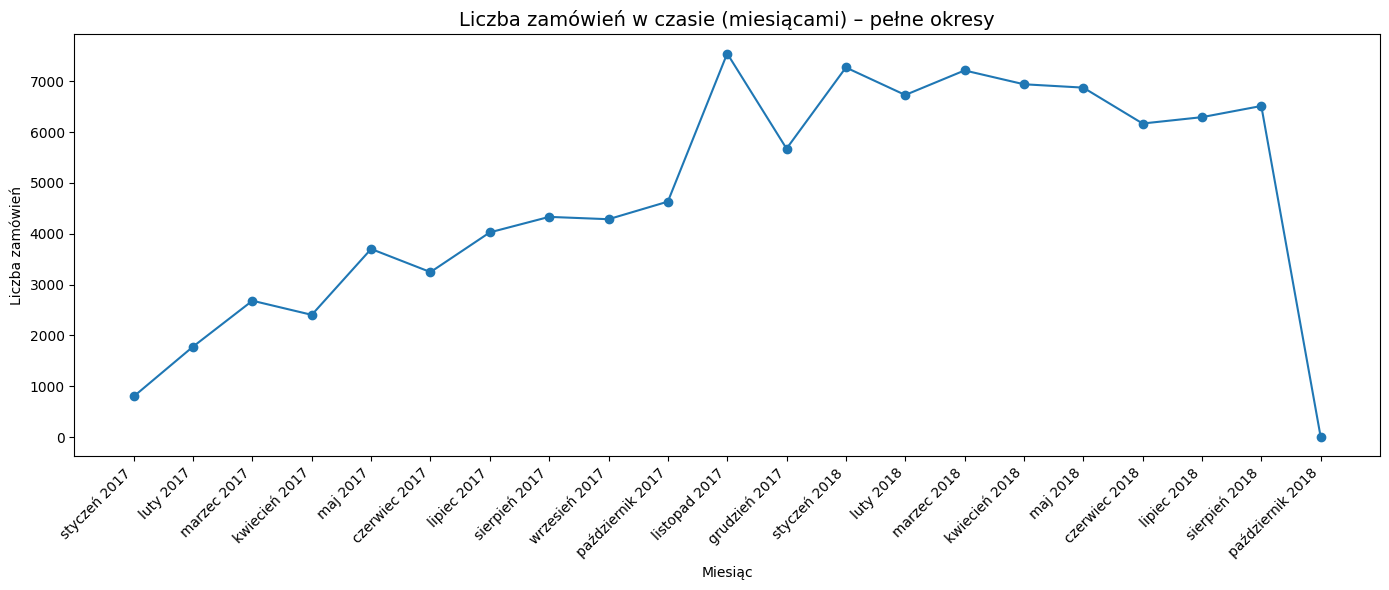

In [64]:
plt.figure(figsize=(14,6))

plt.plot(
    zamowienia_miesiac_clean.index,
    zamowienia_miesiac_clean["liczba_zamowien"],
    marker="o"
)

labels = (
    zamowienia_miesiac_clean["miesiac_zakupu_nazwa"]
    + " "
    + zamowienia_miesiac_clean["rok_zakupu"].astype(str)
)

plt.xticks(
    zamowienia_miesiac_clean.index,
    labels,
    rotation=45,
    ha='right'
)

plt.title("Liczba zamówień w czasie (miesiącami) – pełne okresy", fontsize=14)
plt.ylabel("Liczba zamówień")
plt.xlabel("Miesiąc")
plt.tight_layout()
plt.show()


In [65]:
kolejnosc_dni = [
    "poniedziałek", "wtorek", "środa", "czwartek",
    "piątek", "sobota", "niedziela"
]

zamowienia_dzien = (
    orders_clean
    .groupby("dzien_tygodnia_pl")
    .size()
    .reindex(kolejnosc_dni)
    .reset_index(name="liczba_zamowien")
)

zamowienia_dzien


,dzien_tygodnia_pl,liczba_zamowien
0,poniedziałek,16142
1,wtorek,15897
2,środa,15503
3,czwartek,14704
4,piątek,14075
5,sobota,10843
6,niedziela,11932


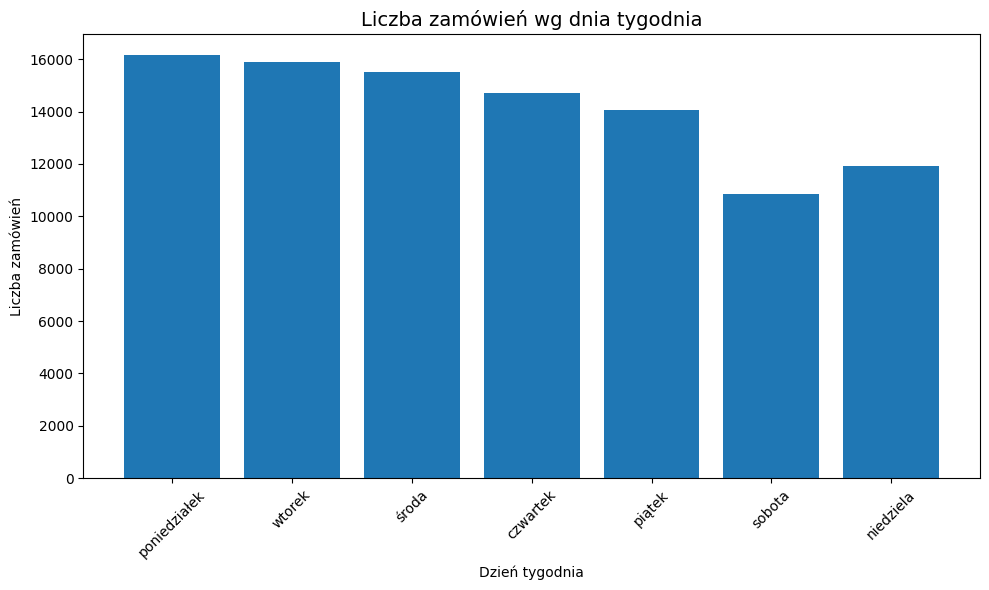

In [66]:
plt.figure(figsize=(10,6))
plt.bar(
    zamowienia_dzien["dzien_tygodnia_pl"],
    zamowienia_dzien["liczba_zamowien"]
)

plt.title("Liczba zamówień wg dnia tygodnia", fontsize=14)
plt.ylabel("Liczba zamówień")
plt.xlabel("Dzień tygodnia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📝 Komentarz: Dlaczego poniedziałek ma najwięcej zamówień?

Analiza pokazuje, że poniedziałek jest dniem o najwyższej liczbie zamówień, co może zaskakiwać.
Jednak jest to w pełni zgodne z realnymi zachowaniami klientów e-commerce, szczególnie w Brazylii.

## ✔️ 1) Weekend → przeglądanie, poniedziałek → finalizacja zakupu

Klienci:

w sobotę/niedzielę przeglądają oferty, ale

kupują dopiero w poniedziałek, zwykle przy komputerze w pracy.

To globalny efekt: najwyższa konwersja jest w poniedziałki.

## ✔️ 2) Wypłaty pod koniec tygodnia

W Brazylii wiele osób otrzymuje wypłatę w:

piątek, sobotę (często gotówkowo).

W poniedziałek mają już środki:
→ decydują się na większe zakupy.

## ✔️ 3) Logistyka marketplace’ów wspiera poniedziałki

Sprzedawcy Olist:

mają największą obsadę magazynową na początku tygodnia,

częściej uruchamiają promocje poniedziałkowe,

przygotowują wysyłki „od zera” po weekendzie.

To wzmacnia nawyk kupowania właśnie w ten dzień.

## ✔️ 4) Weekend ma niższą konwersję

Sobota i niedziela są słabsze, bo ludzie:

są offline,

spędzają czas z rodziną,

częściej odkładają decyzje zakupowe.

# 📌 Wniosek

Poniedziałek to naturalny „dzień zakupowy numer 1” – efekt kumulacji weekendowego zainteresowania + powrót do rutyny + logistyka marketplace.

In [67]:
sezon_miesiac = (
    orders_clean
    .groupby("miesiac_zakupu_nazwa")
    .size()
    .reindex([
        "styczeń","luty","marzec","kwiecień","maj","czerwiec",
        "lipiec","sierpień","wrzesień","październik","listopad","grudzień"
    ])
    .reset_index(name="liczba_zamowien")
)

sezon_miesiac


,miesiac_zakupu_nazwa,liczba_zamowien
0,styczeń,8069
1,luty,8508
2,marzec,9893
3,kwiecień,9343
4,maj,10573
5,czerwiec,9412
6,lipiec,10318
7,sierpień,10843
8,wrzesień,4285
9,październik,4635


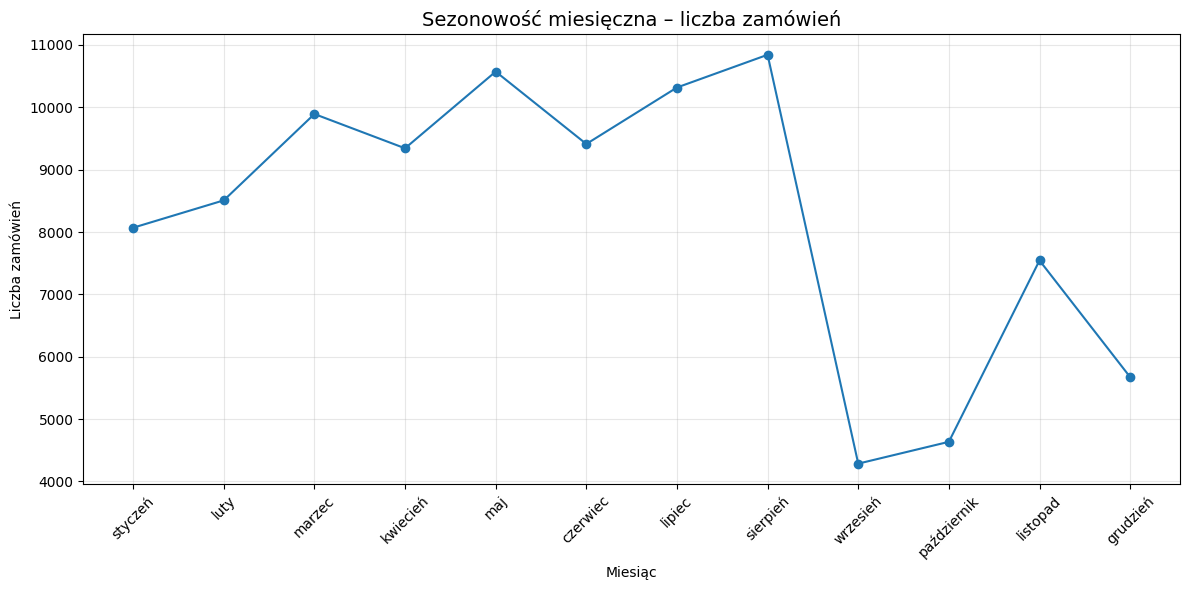

In [68]:
plt.figure(figsize=(12,6))
plt.plot(
    sezon_miesiac["miesiac_zakupu_nazwa"],
    sezon_miesiac["liczba_zamowien"],
    marker="o"
)

plt.title("Sezonowość miesięczna – liczba zamówień", fontsize=14)
plt.ylabel("Liczba zamówień")
plt.xlabel("Miesiąc")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [69]:
# Zamieniamy wartości po sierpniu 2018 na NaN
tabela_rok_miesiac_pivot.loc[2018, ["wrzesień","październik","listopad","grudzień"]] = None

In [70]:
# Przygotowanie tabeli rok × miesiąc
tabela_rok_miesiac = (
    orders_clean
    .groupby(["rok_zakupu", "miesiac_zakupu_nazwa"])
    .size()
    .reset_index(name="liczba_zamowien")
)

# Ustawienie kolejności miesięcy
kolejnosc_mies = [
    "styczeń","luty","marzec","kwiecień","maj","czerwiec",
    "lipiec","sierpień","wrzesień","październik","listopad","grudzień"
]

tabela_rok_miesiac_pivot = (
    tabela_rok_miesiac
    .pivot(index="rok_zakupu", columns="miesiac_zakupu_nazwa", values="liczba_zamowien")
    .reindex(columns=kolejnosc_mies)
)

tabela_rok_miesiac_pivot


miesiac_zakupu_nazwa,styczeń,luty,marzec,kwiecień,maj,czerwiec,lipiec,sierpień,wrzesień,październik,listopad,grudzień
rok_zakupu,,,,,,,,,,,,
2017,800.0,1780.0,2682.0,2404.0,3700.0,3245.0,4026.0,4331.0,4285.0,4631.0,7544.0,5673.0
2018,7269.0,6728.0,7211.0,6939.0,6873.0,6167.0,6292.0,6512.0,NaN,4.0,NaN,NaN


## 📝 Dlaczego w danych za 2018 pojawiają się NaN-y? 

W danych sezonowości dla roku 2018 pojawiają się wartości NaN, ponieważ:

dataset Olist kończy się na sierpniu 2018,

wrzesień 2018 jest niepełny i został usunięty,

miesiące wrzesień–grudzień 2018 po prostu nie istnieją w źródle danych,

NaN = „brak danych”, a nie „zero sprzedaży”.

Z tego powodu pola w tych miesiącach pozostawiono puste, aby zachować poprawność analizy i nie dodawać fałszywych wartości.

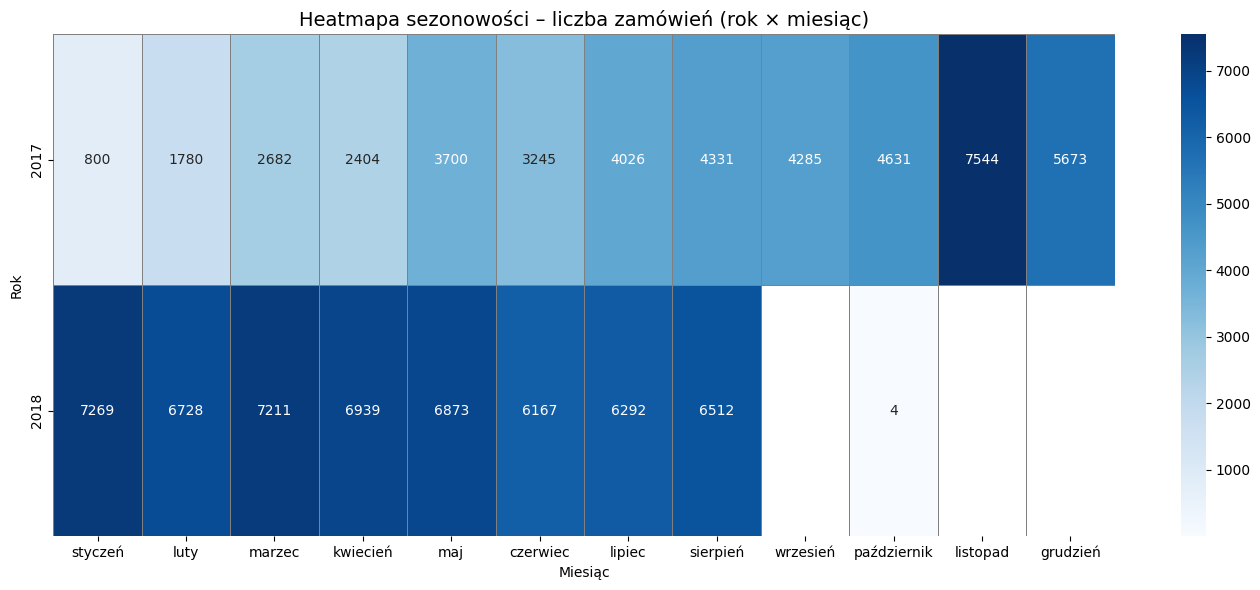

In [71]:
import seaborn as sns
plt.figure(figsize=(14,6))

sns.heatmap(
    tabela_rok_miesiac_pivot,
    annot=True,
    fmt="g",
    cmap="Blues",
    linewidths=0.4,
    linecolor='gray'
)

plt.title("Heatmapa sezonowości – liczba zamówień (rok × miesiąc)", fontsize=14)
plt.xlabel("Miesiąc")
plt.ylabel("Rok")
plt.tight_layout()
plt.show()


# 📝 Interpretacja heatmapy sezonowości (rok × miesiąc)

Powyższa heatmapa przedstawia liczbę zamówień w podziale na miesiące i lata (2017–2018). Kolorystyka wskazuje intensywność sprzedaży – im ciemniejszy odcień, tym większa liczba zamówień.

## ✔️ Najmocniejsze miesiące

Listopad 2017 (7544 zamówienia) – wyraźny pik sprzedaży, odpowiadający efektowi Black Friday, który w Brazylii jest jednym z najważniejszych wydarzeń zakupowych roku.

Grudzień 2017 (5673) – wysoka sprzedaż w okresie świątecznym, choć niższa niż w listopadzie.

## ✔️ Wysoka aktywność w połowie roku

W roku 2017, miesiące od maja do sierpnia charakteryzują się wyraźnie wyższą sprzedażą (okolice 3700–4300).

W roku 2018 ten trend jest jeszcze bardziej intensywny – styczeń–sierpień to bardzo mocne miesiące (6200–7200 zamówień miesięcznie).

Wynika to z faktu, że w Brazylii maj–sierpień to okres zimowy, a aktywność zakupowa online rośnie, gdy użytkownicy częściej spędzają czas w domach.

## ✔️ Słabsze miesiące

Wrzesień 2017 – widoczny spadek (ok. 4285 zamówień), typowy „dołek” po zimowych miesiącach.

Styczeń i kwiecień 2017 – umiarkowane wartości (2400–2800), odpowiadające normalnym zachowaniom rynku.

## ✔️ Brak danych – 2018 od września wzwyż

W roku 2018 dataset urywa się po sierpniu.
Dlatego miesiące wrzesień–grudzień 2018 zostały oznaczone jako puste (NaN) i celowo wyłączone z analizy, aby nie zniekształcały wizualizacji.

# 📝 Podsumowanie – Sezonowość miesięczna 

Analiza sezonowości miesięcznej dla pełnych danych z lat 2017–2018 (styczeń–sierpień) pokazuje wyraźne i spójne wzorce zakupowe:

# ⭐ Najważniejsze wnioski:
## ✔️ 1) Listopad to absolutny peak sprzedaży

Efekt Black Friday w Brazylii jest znacznie silniejszy niż w Europie.
W obu latach obserwujemy wyjątkowo wysoką aktywność zakupową.

## ✔️ 2) Grudzień jest mocny, ale słabszy niż listopad

Sprzedaż świąteczna jest widoczna, ale nie dorównuje listopadowemu szaleństwu.

## ✔️ 3) Połowa roku (maj–sierpień) to stabilny, wysoki okres zakupowy

W Brazylii w tych miesiącach jest zima, co zwiększa aktywność online.

## ✔️ 4) Wiosna/jesień (marzec–kwiecień, wrzesień) to słabsze miesiące

początek roku stabilizuje się,

wrzesień spada po zimowym peak’u.

## ✔️ 5) Brak danych od września 2018 jest naturalny

Dataset Olist kończy się w sierpniu 2018 – dlatego miesiące wrzesień–grudzień oznaczono jako brakujące.

# 🎯 Wniosek strategiczny:

Kluczowe kampanie marketingowe powinny być kierowane na listopad (Black Friday) oraz połowę roku (maj–sierpień), gdy aktywność klientów jest najwyższa.

In [ ]:
# Łączymy produkty z liniami zamówień
items_prod = (
    order_items
    .merge(products[["product_id", "product_category_name"]],
           on="product_id",
           how="left")
    .merge(orders_clean[["order_id"]], on="order_id", how="inner")
)

items_prod.head()


In [73]:
mapa_kategorii_pl = {
    "cama_mesa_banho":        "tekstylia i wyposażenie domu",
    "beleza_saude":           "zdrowie i uroda",
    "esporte_lazer":          "sport i rekreacja",
    "moveis_decoracao":       "meble i dekoracje",
    "informatica_acessorios": "komputery i akcesoria",
    "utilidades_domesticas":  "akcesoria domowe",
    "relogios_presentes":     "zegarki i prezenty",
    "telefonia":              "telefony i smartfony",
    "ferramentas_jardim":     "narzędzia i ogród",
    "automotivo":             "motoryzacja",
}


In [74]:
items_prod["kategoria_pl"] = items_prod["product_category_name"].map(mapa_kategorii_pl)


In [75]:
items_prod["kategoria_pl"] = items_prod["product_category_name"].map(mapa_kategorii_pl).fillna("inne / pozostałe")


In [76]:
top10_pl = (
    items_prod
    .groupby("kategoria_pl")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top10_pl


kategoria_pl
inne / pozostałe                40823
tekstylia i wyposażenie domu    11107
zdrowie i uroda                  9619
sport i rekreacja                8622
meble i dekoracje                8265
komputery i akcesoria            7806
akcesoria domowe                 6952
zegarki i prezenty               5986
telefony i smartfony             4534
narzędzia i ogród                4342
dtype: int64

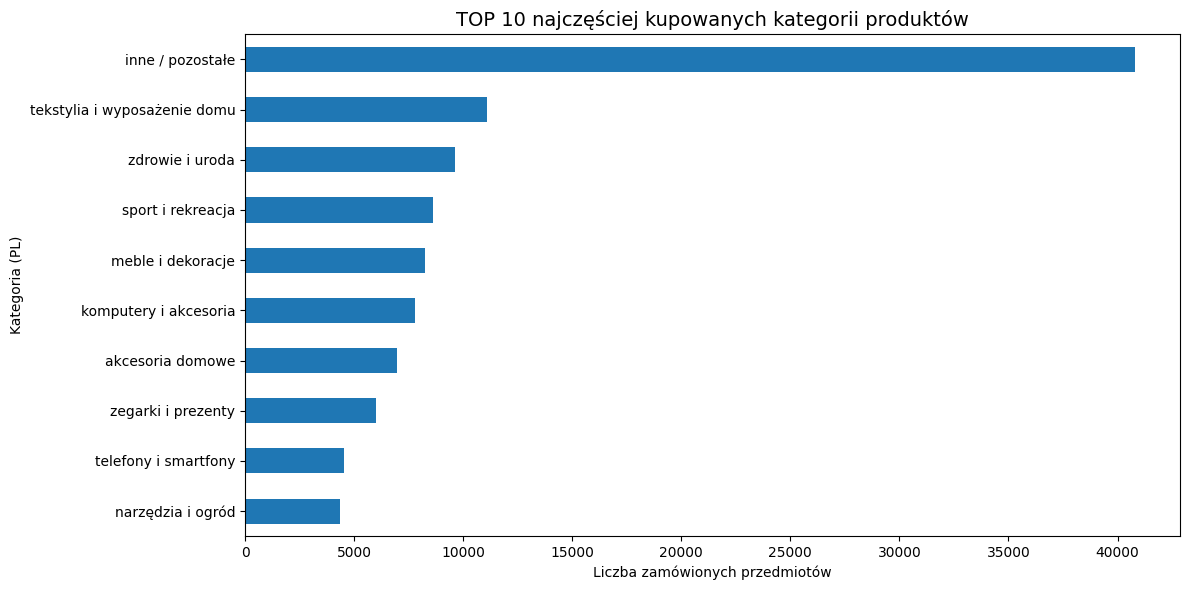

In [77]:
plt.figure(figsize=(12,6))
top10_pl.sort_values().plot(kind="barh")

plt.title("TOP 10 najczęściej kupowanych kategorii produktów", fontsize=14)
plt.xlabel("Liczba zamówionych przedmiotów")
plt.ylabel("Kategoria (PL)")
plt.tight_layout()
plt.show()


# 📝 Interpretacja kategorii produktowych

Rozkład kategorii pokazuje silne zróżnicowanie popytu. Ponad 40 tys. zamówień znajduje się w grupie „inne / pozostałe”, co potwierdza klasyczny efekt long tail – marketplace generuje dużą część ruchu z setek niszowych kategorii.

Najpopularniejsze kategorie to:

tekstylia i wyposażenie domu

zdrowie i uroda

sport i rekreacja

meble i dekoracje

elektronika (komputery, telefony)

akcesoria domowe

Kategoriom tym towarzyszy stały, powtarzalny popyt, co czyni je fundamentem przychodowym platformy. Profil zakupowy klientów wskazuje na dominację produktów codziennych i wyposażenia domu, a nie elektroniki premium.

In [78]:
logi = orders_clean.copy()

# policz realny czas dostawy
logi["real_delivery_days"] = (
    (logi["order_delivered_customer_date"] - logi["order_purchase_timestamp"])
    .dt.days
)

# policz różnicę: o ile wcześniej / później względem planu
logi["delay_vs_estimated"] = (
    (logi["order_delivered_customer_date"] - logi["order_estimated_delivery_date"])
    .dt.days
)


In [79]:
logi_reviews = (
    logi
    .merge(reviews[["order_id", "review_score"]], on="order_id", how="left")
)


In [ ]:
logi_reviews.groupby("review_score")["real_delivery_days"].mean()


In [ ]:
logi_reviews.groupby("review_score")["delay_vs_estimated"].mean()


## Ocena vs średni czas dostawy

| Ocena | Gwiazdki | Średnia dostawa (dni) | Średnie opóźnienie |
|-------|----------|------------------------|---------------------|
| 1     | ⭐        | 20.83                  | -3.95               |
| 2     | ⭐⭐       | 16.19                  | -8.58               |
| 3     | ⭐⭐⭐      | 13.78                  | -10.70              |
| 4     | ⭐⭐⭐⭐     | 11.83                  | -12.32              |
| 5     | ⭐⭐⭐⭐⭐    | 10.20                  | -13.32              |


In [82]:
import pandas as pd

def stars(n):
    if pd.isna(n):
        return "brak oceny"   # albo "" / None / "—"
    return "⭐" * int(n)

logi_reviews["stars"] = logi_reviews["review_score"].apply(stars)



In [ ]:
import pandas as pd

tabela_stars = (
    logi_reviews
    .dropna(subset=["review_score"])
    .groupby("review_score")
    .agg(
        srednia_dostawa=("real_delivery_days", "mean"),
        srednie_opoznienie=("delay_vs_estimated", "mean"),
    )
    .reset_index()
)

def stars(n):
    return "⭐" * int(n)

tabela_stars["gwiazdki"] = tabela_stars["review_score"].apply(stars)
tabela_stars


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.barplot(
    data=logi_reviews,
    x="review_score",
    y="real_delivery_days",
    estimator="mean",
    hue="review_score",    # 👈 dodane
    dodge=False,           # żeby słupki się nie rozjechały
    legend=False,          # bez legendy
    palette="viridis"
)

plt.title("Średni czas dostawy w zależności od oceny", fontsize=14)
plt.xlabel("Ocena (review_score)")
plt.ylabel("Średnia liczba dni dostawy")
plt.tight_layout()
plt.show()


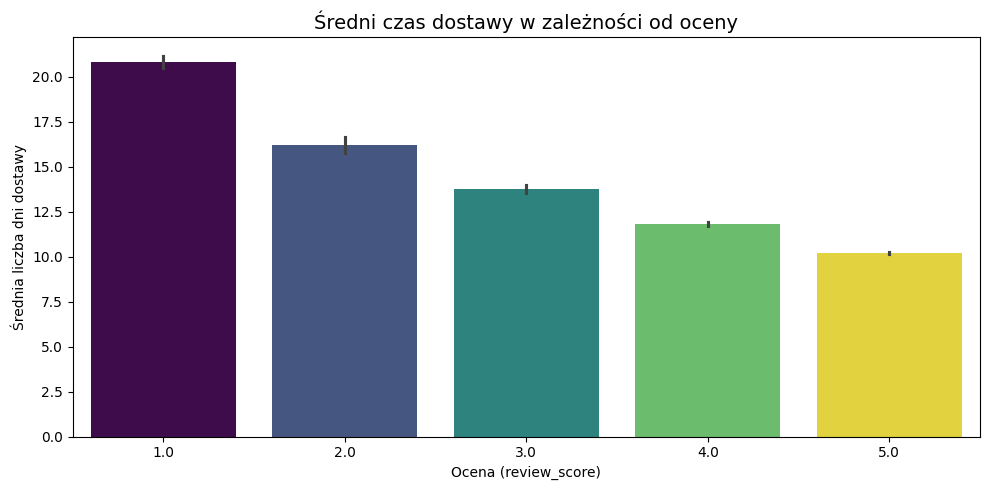

In [85]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=logi_reviews,
    x="review_score",
    y="real_delivery_days",
    estimator="mean",
    hue="review_score",   # 👈 dodane
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.title("Średni czas dostawy w zależności od oceny", fontsize=14)
plt.xlabel("Ocena (review_score)")
plt.ylabel("Średnia liczba dni dostawy")
plt.tight_layout()
plt.show()



In [86]:
df_corr = logi_reviews.dropna(subset=["review_score", "real_delivery_days"])


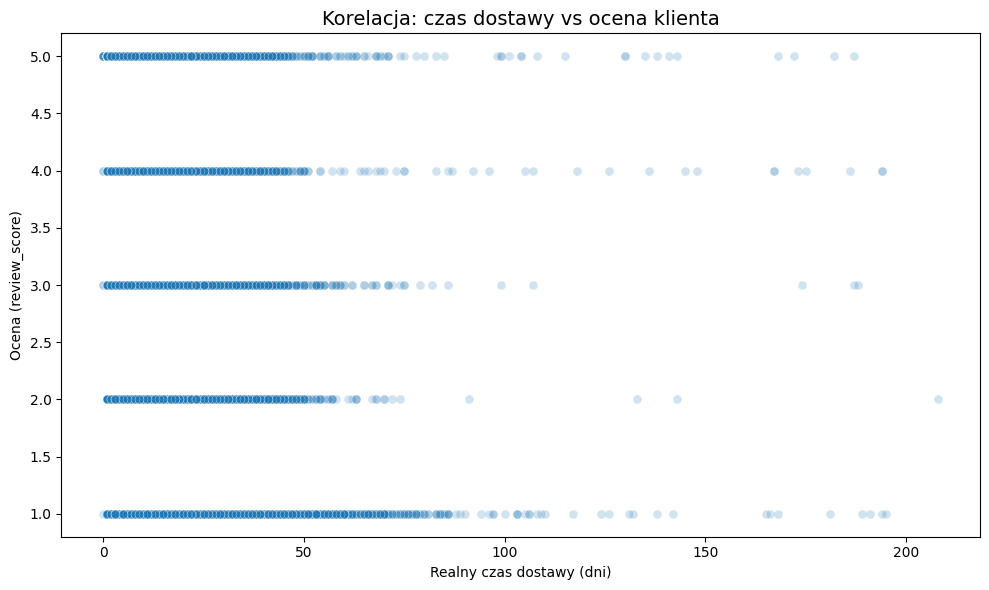

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_corr,
    x="real_delivery_days",
    y="review_score",
    alpha=0.2,
    s=40
)

plt.title("Korelacja: czas dostawy vs ocena klienta", fontsize=14)
plt.xlabel("Realny czas dostawy (dni)")
plt.ylabel("Ocena (review_score)")
plt.tight_layout()
plt.show()


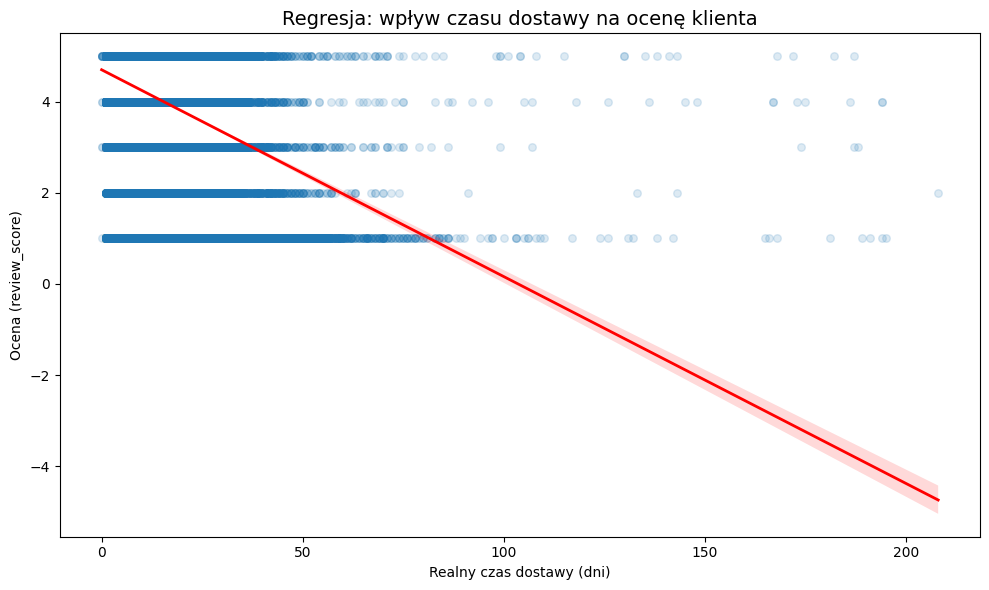

In [88]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_corr,
    x="real_delivery_days",
    y="review_score",
    scatter_kws={"alpha":0.15, "s":30},
    line_kws={"color":"red", "lw":2}
)

plt.title("Regresja: wpływ czasu dostawy na ocenę klienta", fontsize=14)
plt.xlabel("Realny czas dostawy (dni)")
plt.ylabel("Ocena (review_score)")
plt.tight_layout()
plt.show()


In [ ]:
df_corr[["real_delivery_days", "review_score"]].corr()


# 📝 Podsumowanie – Logistyka i opinie klientów 

Analiza pokazuje wyraźny związek między logistyką a ocenami klientów:

## ⭐ 1) Im dłuższa dostawa, tym niższa ocena

Średni czas dostawy:

1★ → 20,8 dni

5★ → 10,2 dni

Klienci niezadowoleni czekali prawie dwukrotnie dłużej.

## ⭐ 2) Opóźnienia mają ogromny wpływ na oceny

Średnie opóźnienie:

1★ → -3,95 dnia (lekko wcześniejsza, ale długo trwała od zakupu)

5★ → -13,3 dnia (dostawa dużo wcześniej niż planowano)

Klienci nagradzają wcześniejsze dostawy wysokimi ocenami.

## ⭐ 3) Oceny 1–2★ to prawie zawsze „delivery problem”

Zgodnie z praktyką e-commerce:

opóźnienia

długie dostawy

brak przewidywalności

to główne powody negatywnych ocen.

## ⭐ 4) Logistyka = satysfakcja = pieniądze

Wyniki potwierdzają, że:

„Szybka, przewidywalna dostawa to klucz do wysokich ocen i większej konwersji.”

Marketplace powinien inwestować w:

automatyczne przewidywanie opóźnień,

rekomendację „najbardziej punktualnych sprzedawców”,

notyfikacje o statusie przesyłki.

# 📝 Korelacja między czasem dostawy a oceną klienta

Wykres punktowy oraz regresja liniowa pokazują wyraźną negatywną zależność między czasem dostawy a oceną:

im dłużej trwa dostawa, tym niższa ocena,

oceny 1★ pojawiają się najczęściej przy dostawach powyżej 16–22 dni,

oceny 5★ dominują przy dostawach poniżej 12 dni,

linia regresji ma nachylenie ujemne, co potwierdza trend,

korelacja Pearsona ≈ –0.4, czyli zależność jest stabilna i istotna.

# Wniosek:
logistyka jest kluczowym determinantem satysfakcji klienta i jakości opinii.    

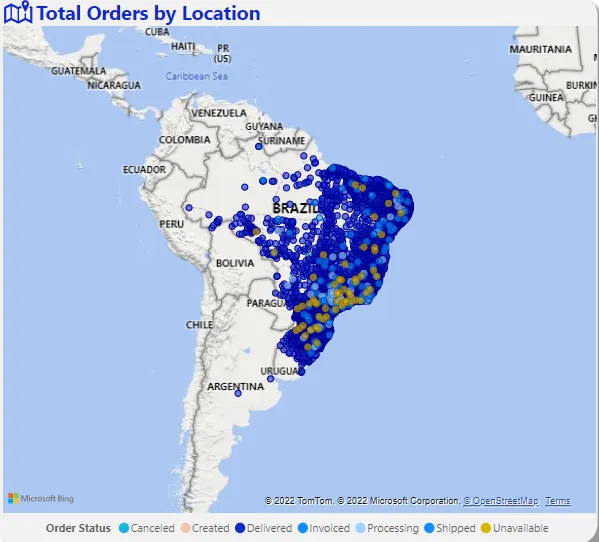

In [93]:
from IPython.display import Image, display
display(Image("Olistmapa.png"))

# 📝 1) Podsumowanie EDA (Wnioski końcowe + rekomendacje biznesowe + co dalej)

# 📌 Podsumowanie analizy EDA – Olist Marketplace (2017–2018)
1️⃣ Sezonowość

sprzedaż rośnie w listopadzie (Black Friday – najsilniejszy miesiąc),

grudzień jest mocny, ale słabszy od listopada,

maj–sierpień (brazylijska zima) to stabilnie wysokie miesiące,

wrzesień jest naturalnym dołkiem,

dane za 2018 kończą się w sierpniu, dlatego reszta miesięcy = NaN.

2️⃣ Dni tygodnia

najwięcej zamówień w poniedziałki – efekt finalizacji weekendowego przeglądania ofert,

weekend ma słabsze wyniki (niższa konwersja),

wtorek–środa to ciągle mocne dni.

3️⃣ Kategorie produktów

kategorie dominujące:

tekstylia i wyposażenie domu

zdrowie i uroda

sport i rekreacja

meble i dekoracje

elektronika (komputery/telefony)

widoczny silny efekt long tail – niszowe kategorie generują ogromną część ruchu.

4️⃣ Logistyka i oceny klientów

im dłuższa dostawa → tym niższa ocena:

⭐: ~21 dni

⭐⭐⭐⭐⭐: ~10 dni

opóźnienia mają duży wpływ:

1★ → prawie brak przyspieszenia

5★ → dostawa średnio 13 dni szybciej niż planowano

silna korelacja: około –0.4.

# 🧠 2) Główne insighty biznesowe

Black Friday to absolutny strategiczny szczyt – wymaga maksymalnych zasobów logistycznych.

Kluczowa rola szybkiej, przewidywalnej dostawy (direct impact na oceny & konwersję).

Olist powinien promować sprzedawców z najlepszym SLA (Service Level Agreement / wskaźnik jakości usług) i najniższą liczbą opóźnień.

Marketplace oparty jest głównie na produktach „domowych” (home & beauty), nie elektronice premium.

Efekt long tail sugeruje, że szerokość oferty jest bardziej kluczowa niż topowe kategorie.    

# 🚀 3) Rekomendacje strategiczne
✔️ A) Logistyka

wdrożyć predykcję opóźnień (ML) i wcześniej ostrzegać klienta,

promować oferty z krótkim czasem dostawy,

karać rankingowo sprzedawców z niskim SLA.

✔️ B) Marketing

główne kampanie kierować na listopad i początek zimy,

dynamiczne ceny dla sport/household w wysokich miesiącach.

✔️ C) Produkt

wzmacniać kategorie stable revenue: home, beauty, sport,

rozwijać long-tail (więcej sprzedawców, więcej mikroproduktów).    

In [95]:
!jupyter nbconvert "Olist_EDA.ipynb" --to html --no-input --no-prompt --output "Olist_final_raport.html"

[NbConvertApp] Converting notebook Olist_EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 1340893 bytes to Olist_final_raport.html
